# **Load Necessary Library**

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy as sp

In [2]:
import librosa
import librosa.display
import os
import json
import numpy as np

# **Load input data_3**

In [8]:
up =  './keywords/up/004ae714_nohash_0.wav'

In [9]:
ipd.Audio(up)

## **Load and Identify duration**

In [10]:
#load
up,sr = librosa.load(up)

#sample duration
sample_duration = 1/sr
print(f"Duration of 1 sample is:{sample_duration: .6f} seconds")

# duration of audio signal
duration = sample_duration * len(up)
print(f"Duration of 1 sample is:{duration: .6f} seconds")


Duration of 1 sample is: 0.000045 seconds
Duration of 1 sample is: 0.928844 seconds


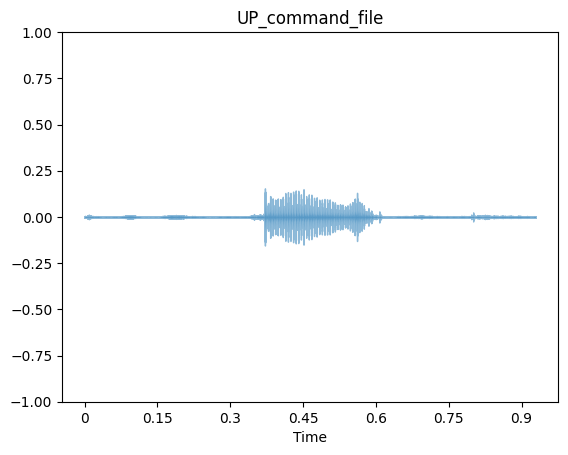

In [11]:
librosa.display.waveshow(up,alpha=0.5)
plt.ylim((-1,1))
plt.title('UP_command_file')
plt.show()

# **FFT**

In [12]:
#fft --> Spectrum

fft_up = np.fft.fft(up)

magnitude_d = np.abs(fft_up)

frequency_d = np.linspace(0,sr,len(magnitude_d))

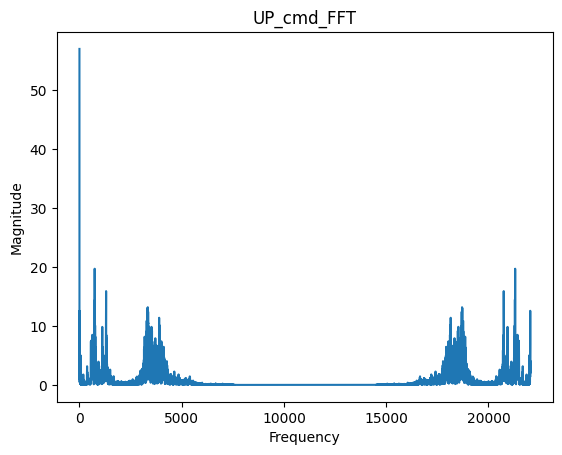

In [13]:
#Visualize Input data

plt.plot(frequency_d,magnitude_d)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
#plt.ylim((-1,1))
plt.title('UP_cmd_FFT')

plt.show()

# **STFT**

In [14]:
#stft -- spectrogram

n_fft = 2048 #no.of.sample
hop_length = 512 #amount of shift h-fouriertransform

#dog
stft_d = librosa.core.stft(up,hop_length=hop_length,n_fft=n_fft)
spectrogram_d = np.abs(stft_d)
#convert viewable form of low point
log_spectrogram_d = librosa.amplitude_to_db(spectrogram_d)

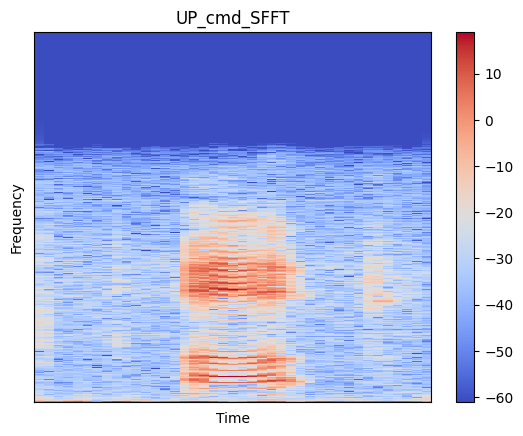

In [15]:
#Visualize Input data

librosa.display.specshow(log_spectrogram_d,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('UP_cmd_SFFT')
plt.show()

# **MFFCS**

In [16]:
#MFCCS
#n_mfcc013= commonly using
MFFCS_d = librosa.feature.mfcc(y=up,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

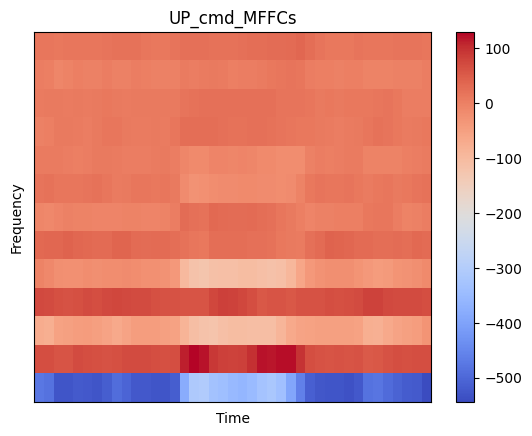

In [17]:
librosa.display.specshow(MFFCS_d,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title('UP_cmd_MFFCs')
plt.show()

# **Preprocessing the All data and Generate Json_File**

In [21]:
DATASET_PATH = "./keywords"
JSON_PATH = "control_keywords.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio

In [24]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file.

    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


## **Initiate the function**

In [25]:
preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'keywords\down'
./keywords\down\00176480_nohash_0.wav: 0
./keywords\down\004ae714_nohash_0.wav: 0
./keywords\down\00b01445_nohash_0.wav: 0
./keywords\down\00b01445_nohash_1.wav: 0
./keywords\down\00f0204f_nohash_0.wav: 0
./keywords\down\0132a06d_nohash_0.wav: 0
./keywords\down\0132a06d_nohash_1.wav: 0
./keywords\down\0132a06d_nohash_2.wav: 0
./keywords\down\0132a06d_nohash_3.wav: 0
./keywords\down\0132a06d_nohash_4.wav: 0
./keywords\down\0137b3f4_nohash_0.wav: 0
./keywords\down\0137b3f4_nohash_1.wav: 0
./keywords\down\0137b3f4_nohash_2.wav: 0
./keywords\down\0137b3f4_nohash_3.wav: 0
./keywords\down\0137b3f4_nohash_4.wav: 0
./keywords\down\014f9f65_nohash_0.wav: 0
./keywords\down\016e2c6d_nohash_0.wav: 0
./keywords\down\016e2c6d_nohash_1.wav: 0
./keywords\down\016e2c6d_nohash_2.wav: 0
./keywords\down\019fa366_nohash_0.wav: 0
./keywords\down\01b4757a_nohash_0.wav: 0
./keywords\down\01bb6a2a_nohash_0.wav: 0
./keywords\down\01bb6a2a_nohash_1.wav: 0
./keywords\down\01bb6a2a_noh

./keywords\down\1d919a90_nohash_0.wav: 0
./keywords\down\1d919a90_nohash_1.wav: 0
./keywords\down\1daa5ada_nohash_2.wav: 0
./keywords\down\1dce06e8_nohash_0.wav: 0
./keywords\down\1df483c0_nohash_0.wav: 0
./keywords\down\1df483c0_nohash_1.wav: 0
./keywords\down\1e412fac_nohash_0.wav: 0
./keywords\down\1e412fac_nohash_1.wav: 0
./keywords\down\1e412fac_nohash_2.wav: 0
./keywords\down\1e9b215e_nohash_0.wav: 0
./keywords\down\1e9b215e_nohash_2.wav: 0
./keywords\down\1e9b215e_nohash_3.wav: 0
./keywords\down\1ecfb537_nohash_0.wav: 0
./keywords\down\1ecfb537_nohash_1.wav: 0
./keywords\down\1ecfb537_nohash_2.wav: 0
./keywords\down\1ecfb537_nohash_3.wav: 0
./keywords\down\1ecfb537_nohash_4.wav: 0
./keywords\down\1eddce1d_nohash_0.wav: 0
./keywords\down\1eddce1d_nohash_1.wav: 0
./keywords\down\1fd85ee4_nohash_0.wav: 0
./keywords\down\1fe4c891_nohash_0.wav: 0
./keywords\down\1fe4c891_nohash_1.wav: 0
./keywords\down\1fe4c891_nohash_2.wav: 0
./keywords\down\1ffd513b_nohash_0.wav: 0
./keywords\down\

./keywords\down\365531e2_nohash_0.wav: 0
./keywords\down\370844f7_nohash_0.wav: 0
./keywords\down\3777c08e_nohash_0.wav: 0
./keywords\down\377e916b_nohash_0.wav: 0
./keywords\down\37bd115d_nohash_0.wav: 0
./keywords\down\37d38e44_nohash_0.wav: 0
./keywords\down\37d38e44_nohash_1.wav: 0
./keywords\down\37d38e44_nohash_2.wav: 0
./keywords\down\37dca74f_nohash_0.wav: 0
./keywords\down\37dca74f_nohash_1.wav: 0
./keywords\down\37dca74f_nohash_2.wav: 0
./keywords\down\37dca74f_nohash_3.wav: 0
./keywords\down\37dca74f_nohash_4.wav: 0
./keywords\down\37fc5d97_nohash_0.wav: 0
./keywords\down\380abbad_nohash_0.wav: 0
./keywords\down\380abbad_nohash_1.wav: 0
./keywords\down\3847619e_nohash_0.wav: 0
./keywords\down\3847619e_nohash_1.wav: 0
./keywords\down\3852fca2_nohash_0.wav: 0
./keywords\down\38c388bc_nohash_0.wav: 0
./keywords\down\38c388bc_nohash_1.wav: 0
./keywords\down\38d78313_nohash_0.wav: 0
./keywords\down\38d78313_nohash_1.wav: 0
./keywords\down\38d78313_nohash_2.wav: 0
./keywords\down\

./keywords\down\51055bda_nohash_2.wav: 0
./keywords\down\51055bda_nohash_3.wav: 0
./keywords\down\51055bda_nohash_4.wav: 0
./keywords\down\5165cf0a_nohash_0.wav: 0
./keywords\down\518588b6_nohash_0.wav: 0
./keywords\down\518588b6_nohash_1.wav: 0
./keywords\down\5188de0d_nohash_0.wav: 0
./keywords\down\5188de0d_nohash_1.wav: 0
./keywords\down\5188de0d_nohash_2.wav: 0
./keywords\down\51f4d5b0_nohash_0.wav: 0
./keywords\down\520b2c17_nohash_0.wav: 0
./keywords\down\520b2c17_nohash_1.wav: 0
./keywords\down\520e8c0e_nohash_0.wav: 0
./keywords\down\520e8c0e_nohash_1.wav: 0
./keywords\down\528f9242_nohash_0.wav: 0
./keywords\down\528f9242_nohash_1.wav: 0
./keywords\down\528f9242_nohash_2.wav: 0
./keywords\down\529eda42_nohash_0.wav: 0
./keywords\down\529eda42_nohash_1.wav: 0
./keywords\down\531a5b8a_nohash_0.wav: 0
./keywords\down\53578f4e_nohash_0.wav: 0
./keywords\down\538e1856_nohash_0.wav: 0
./keywords\down\53d5b86f_nohash_0.wav: 0
./keywords\down\53eb0a88_nohash_0.wav: 0
./keywords\down\

./keywords\down\6c968bd9_nohash_1.wav: 0
./keywords\down\6c968bd9_nohash_2.wav: 0
./keywords\down\6c968bd9_nohash_3.wav: 0
./keywords\down\6c968bd9_nohash_4.wav: 0
./keywords\down\6cb6eee7_nohash_0.wav: 0
./keywords\down\6cc28ce5_nohash_0.wav: 0
./keywords\down\6cf5459b_nohash_0.wav: 0
./keywords\down\6d2d3b0d_nohash_0.wav: 0
./keywords\down\6d2d3b0d_nohash_1.wav: 0
./keywords\down\6d2d3b0d_nohash_2.wav: 0
./keywords\down\6d818f6c_nohash_0.wav: 0
./keywords\down\6e41a77e_nohash_0.wav: 0
./keywords\down\6e41a77e_nohash_1.wav: 0
./keywords\down\6e74c582_nohash_0.wav: 0
./keywords\down\6e74c582_nohash_1.wav: 0
./keywords\down\6e8b9b7b_nohash_0.wav: 0
./keywords\down\6ef76186_nohash_0.wav: 0
./keywords\down\6ef76186_nohash_1.wav: 0
./keywords\down\6ef76186_nohash_2.wav: 0
./keywords\down\6ef76186_nohash_3.wav: 0
./keywords\down\6f1ffef6_nohash_0.wav: 0
./keywords\down\6f2c6f7e_nohash_0.wav: 0
./keywords\down\6f2f57c1_nohash_0.wav: 0
./keywords\down\6f2f57c1_nohash_1.wav: 0
./keywords\down\

./keywords\down\86b89661_nohash_0.wav: 0
./keywords\down\86cb59b2_nohash_0.wav: 0
./keywords\down\86f12ac0_nohash_0.wav: 0
./keywords\down\87014d40_nohash_0.wav: 0
./keywords\down\87728a88_nohash_1.wav: 0
./keywords\down\8781f4c1_nohash_0.wav: 0
./keywords\down\88120683_nohash_0.wav: 0
./keywords\down\881583a6_nohash_0.wav: 0
./keywords\down\881583a6_nohash_1.wav: 0
./keywords\down\8830e17f_nohash_0.wav: 0
./keywords\down\8830e17f_nohash_1.wav: 0
./keywords\down\8830e17f_nohash_2.wav: 0
./keywords\down\8830e17f_nohash_3.wav: 0
./keywords\down\8830e17f_nohash_4.wav: 0
./keywords\down\8843b25f_nohash_0.wav: 0
./keywords\down\884ae8e1_nohash_0.wav: 0
./keywords\down\884ae8e1_nohash_1.wav: 0
./keywords\down\888a0c49_nohash_0.wav: 0
./keywords\down\888a0c49_nohash_1.wav: 0
./keywords\down\888a0c49_nohash_2.wav: 0
./keywords\down\888a0c49_nohash_3.wav: 0
./keywords\down\888a0c49_nohash_4.wav: 0
./keywords\down\88a487ce_nohash_0.wav: 0
./keywords\down\88a487ce_nohash_1.wav: 0
./keywords\down\

./keywords\down\9ff2d2f4_nohash_2.wav: 0
./keywords\down\9ff2d2f4_nohash_3.wav: 0
./keywords\down\9ff2d2f4_nohash_4.wav: 0
./keywords\down\a0a8d759_nohash_0.wav: 0
./keywords\down\a0a8d759_nohash_1.wav: 0
./keywords\down\a0f93943_nohash_0.wav: 0
./keywords\down\a108341b_nohash_0.wav: 0
./keywords\down\a108341b_nohash_1.wav: 0
./keywords\down\a1533da4_nohash_0.wav: 0
./keywords\down\a1533da4_nohash_1.wav: 0
./keywords\down\a16b3102_nohash_0.wav: 0
./keywords\down\a19452d5_nohash_0.wav: 0
./keywords\down\a19452d5_nohash_1.wav: 0
./keywords\down\a19452d5_nohash_2.wav: 0
./keywords\down\a1cff772_nohash_0.wav: 0
./keywords\down\a1cff772_nohash_1.wav: 0
./keywords\down\a1cff772_nohash_2.wav: 0
./keywords\down\a1cff772_nohash_3.wav: 0
./keywords\down\a1cff772_nohash_4.wav: 0
./keywords\down\a1dd919f_nohash_0.wav: 0
./keywords\down\a243fcc2_nohash_0.wav: 0
./keywords\down\a243fcc2_nohash_1.wav: 0
./keywords\down\a24582a0_nohash_0.wav: 0
./keywords\down\a24cf51c_nohash_0.wav: 0
./keywords\down\

./keywords\down\b8897f1c_nohash_0.wav: 0
./keywords\down\b8c48ffb_nohash_0.wav: 0
./keywords\down\b8c48ffb_nohash_1.wav: 0
./keywords\down\b93528e3_nohash_0.wav: 0
./keywords\down\b93528e3_nohash_1.wav: 0
./keywords\down\b9515bf3_nohash_0.wav: 0
./keywords\down\b9515bf3_nohash_1.wav: 0
./keywords\down\b9515bf3_nohash_2.wav: 0
./keywords\down\b9515bf3_nohash_3.wav: 0
./keywords\down\b959cd0c_nohash_0.wav: 0
./keywords\down\b959cd0c_nohash_1.wav: 0
./keywords\down\b959cd0c_nohash_2.wav: 0
./keywords\down\b959cd0c_nohash_3.wav: 0
./keywords\down\b959cd0c_nohash_4.wav: 0
./keywords\down\b97c9f77_nohash_0.wav: 0
./keywords\down\b97c9f77_nohash_1.wav: 0
./keywords\down\b97c9f77_nohash_2.wav: 0
./keywords\down\b97c9f77_nohash_3.wav: 0
./keywords\down\b97c9f77_nohash_4.wav: 0
./keywords\down\b9cccd01_nohash_0.wav: 0
./keywords\down\b9db6e42_nohash_0.wav: 0
./keywords\down\b9f46737_nohash_0.wav: 0
./keywords\down\b9f46737_nohash_1.wav: 0
./keywords\down\b9f46737_nohash_2.wav: 0
./keywords\down\

./keywords\down\cb8f8307_nohash_2.wav: 0
./keywords\down\cb8f8307_nohash_3.wav: 0
./keywords\down\cb8f8307_nohash_4.wav: 0
./keywords\down\cb8f8307_nohash_5.wav: 0
./keywords\down\cb8f8307_nohash_6.wav: 0
./keywords\down\cb8f8307_nohash_7.wav: 0
./keywords\down\cc3d1613_nohash_0.wav: 0
./keywords\down\cc6bae0d_nohash_0.wav: 0
./keywords\down\cc6bae0d_nohash_1.wav: 0
./keywords\down\cc6ee39b_nohash_0.wav: 0
./keywords\down\cc6ee39b_nohash_1.wav: 0
./keywords\down\cc6ee39b_nohash_2.wav: 0
./keywords\down\cc6ee39b_nohash_3.wav: 0
./keywords\down\cc6ee39b_nohash_4.wav: 0
./keywords\down\cc71bada_nohash_0.wav: 0
./keywords\down\ccb1266b_nohash_0.wav: 0
./keywords\down\cce17a61_nohash_0.wav: 0
./keywords\down\ccea893d_nohash_0.wav: 0
./keywords\down\ccea893d_nohash_1.wav: 0
./keywords\down\ccf418a5_nohash_0.wav: 0
./keywords\down\ccfd721c_nohash_0.wav: 0
./keywords\down\ccfd721c_nohash_1.wav: 0
./keywords\down\cd7f8c1b_nohash_0.wav: 0
./keywords\down\cd7f8c1b_nohash_1.wav: 0
./keywords\down\

./keywords\down\e14d3db8_nohash_0.wav: 0
./keywords\down\e2362167_nohash_0.wav: 0
./keywords\down\e2362167_nohash_1.wav: 0
./keywords\down\e269bac0_nohash_0.wav: 0
./keywords\down\e3b64217_nohash_0.wav: 0
./keywords\down\e3e49931_nohash_0.wav: 0
./keywords\down\e3e49931_nohash_1.wav: 0
./keywords\down\e41a903b_nohash_0.wav: 0
./keywords\down\e41a903b_nohash_1.wav: 0
./keywords\down\e41a903b_nohash_2.wav: 0
./keywords\down\e41a903b_nohash_3.wav: 0
./keywords\down\e41a903b_nohash_4.wav: 0
./keywords\down\e53139ad_nohash_0.wav: 0
./keywords\down\e53139ad_nohash_1.wav: 0
./keywords\down\e53139ad_nohash_2.wav: 0
./keywords\down\e53139ad_nohash_3.wav: 0
./keywords\down\e53139ad_nohash_4.wav: 0
./keywords\down\e54a0f16_nohash_0.wav: 0
./keywords\down\e54a0f16_nohash_1.wav: 0
./keywords\down\e54a0f16_nohash_2.wav: 0
./keywords\down\e54a0f16_nohash_3.wav: 0
./keywords\down\e54a0f16_nohash_4.wav: 0
./keywords\down\e55a2b20_nohash_0.wav: 0
./keywords\down\e5afa9b0_nohash_0.wav: 0
./keywords\down\

./keywords\down\fc94edb0_nohash_0.wav: 0
./keywords\down\fcb25a78_nohash_0.wav: 0
./keywords\down\fce65496_nohash_0.wav: 0
./keywords\down\fce96bac_nohash_0.wav: 0
./keywords\down\fd32732a_nohash_0.wav: 0
./keywords\down\fd32732a_nohash_1.wav: 0
./keywords\down\fd395b74_nohash_0.wav: 0
./keywords\down\fd395b74_nohash_1.wav: 0
./keywords\down\fd395b74_nohash_2.wav: 0
./keywords\down\fd395b74_nohash_3.wav: 0
./keywords\down\fd395b74_nohash_4.wav: 0
./keywords\down\fda46b78_nohash_0.wav: 0
./keywords\down\fda46b78_nohash_1.wav: 0
./keywords\down\fe291fa9_nohash_0.wav: 0
./keywords\down\fe291fa9_nohash_1.wav: 0
./keywords\down\fe5c4a7a_nohash_0.wav: 0
./keywords\down\fe5c4a7a_nohash_1.wav: 0
./keywords\down\feb1d305_nohash_0.wav: 0
./keywords\down\feb1d305_nohash_1.wav: 0
./keywords\down\feb1d305_nohash_2.wav: 0
./keywords\down\ff21fb59_nohash_0.wav: 0
./keywords\down\ffa76c4a_nohash_0.wav: 0
./keywords\down\ffd2ba2f_nohash_0.wav: 0
./keywords\down\ffd2ba2f_nohash_1.wav: 0
./keywords\down\

./keywords\go\190821dc_nohash_4.wav: 1
./keywords\go\1942abd7_nohash_1.wav: 1
./keywords\go\19785c4e_nohash_0.wav: 1
./keywords\go\1995cf9e_nohash_0.wav: 1
./keywords\go\1995cf9e_nohash_1.wav: 1
./keywords\go\199da2bf_nohash_0.wav: 1
./keywords\go\19e246ad_nohash_0.wav: 1
./keywords\go\19e98e89_nohash_0.wav: 1
./keywords\go\1a5b9ca4_nohash_0.wav: 1
./keywords\go\1a5b9ca4_nohash_1.wav: 1
./keywords\go\1a673010_nohash_0.wav: 1
./keywords\go\1a6eca98_nohash_0.wav: 1
./keywords\go\1aed7c6d_nohash_0.wav: 1
./keywords\go\1aeef15e_nohash_0.wav: 1
./keywords\go\1b459024_nohash_0.wav: 1
./keywords\go\1b459024_nohash_1.wav: 1
./keywords\go\1b4c9b89_nohash_0.wav: 1
./keywords\go\1b4c9b89_nohash_1.wav: 1
./keywords\go\1b4c9b89_nohash_2.wav: 1
./keywords\go\1b4c9b89_nohash_3.wav: 1
./keywords\go\1b4c9b89_nohash_4.wav: 1
./keywords\go\1b63157b_nohash_0.wav: 1
./keywords\go\1b835b87_nohash_0.wav: 1
./keywords\go\1ba20be2_nohash_0.wav: 1
./keywords\go\1ba20be2_nohash_1.wav: 1
./keywords\go\1ba20be2_no

./keywords\go\36050ef3_nohash_1.wav: 1
./keywords\go\36050ef3_nohash_2.wav: 1
./keywords\go\36050ef3_nohash_3.wav: 1
./keywords\go\36050ef3_nohash_4.wav: 1
./keywords\go\363c6bad_nohash_0.wav: 1
./keywords\go\364f979f_nohash_0.wav: 1
./keywords\go\364f979f_nohash_1.wav: 1
./keywords\go\364f979f_nohash_2.wav: 1
./keywords\go\364f979f_nohash_3.wav: 1
./keywords\go\36de13e1_nohash_0.wav: 1
./keywords\go\36de13e1_nohash_1.wav: 1
./keywords\go\370844f7_nohash_0.wav: 1
./keywords\go\370844f7_nohash_1.wav: 1
./keywords\go\370844f7_nohash_2.wav: 1
./keywords\go\3777c08e_nohash_0.wav: 1
./keywords\go\37b03ab1_nohash_0.wav: 1
./keywords\go\37dca74f_nohash_0.wav: 1
./keywords\go\37dca74f_nohash_1.wav: 1
./keywords\go\37dca74f_nohash_2.wav: 1
./keywords\go\37dca74f_nohash_3.wav: 1
./keywords\go\37dca74f_nohash_4.wav: 1
./keywords\go\3847619e_nohash_0.wav: 1
./keywords\go\3847619e_nohash_1.wav: 1
./keywords\go\3852fca2_nohash_0.wav: 1
./keywords\go\3852fca2_nohash_1.wav: 1
./keywords\go\38c388bc_no

./keywords\go\50f55535_nohash_1.wav: 1
./keywords\go\51055bda_nohash_0.wav: 1
./keywords\go\51055bda_nohash_1.wav: 1
./keywords\go\51055bda_nohash_2.wav: 1
./keywords\go\51055bda_nohash_3.wav: 1
./keywords\go\51055bda_nohash_4.wav: 1
./keywords\go\5184ed3e_nohash_0.wav: 1
./keywords\go\51995cea_nohash_0.wav: 1
./keywords\go\51f4d5b0_nohash_0.wav: 1
./keywords\go\520b2c17_nohash_0.wav: 1
./keywords\go\520b2c17_nohash_1.wav: 1
./keywords\go\530306f5_nohash_0.wav: 1
./keywords\go\530306f5_nohash_1.wav: 1
./keywords\go\531a5b8a_nohash_0.wav: 1
./keywords\go\53458368_nohash_0.wav: 1
./keywords\go\53458368_nohash_1.wav: 1
./keywords\go\53578f4e_nohash_0.wav: 1
./keywords\go\538e1856_nohash_0.wav: 1
./keywords\go\53d5b86f_nohash_0.wav: 1
./keywords\go\541120c7_nohash_0.wav: 1
./keywords\go\551e42e8_nohash_0.wav: 1
./keywords\go\551e42e8_nohash_1.wav: 1
./keywords\go\551e42e8_nohash_2.wav: 1
./keywords\go\553f1a79_nohash_0.wav: 1
./keywords\go\553f1a79_nohash_1.wav: 1
./keywords\go\553f1a79_no

./keywords\go\6d818f6c_nohash_1.wav: 1
./keywords\go\6dfff95a_nohash_0.wav: 1
./keywords\go\6e2ef3d5_nohash_0.wav: 1
./keywords\go\6e2ef3d5_nohash_1.wav: 1
./keywords\go\6e41a77e_nohash_0.wav: 1
./keywords\go\6f2c6f7e_nohash_0.wav: 1
./keywords\go\6f2c6f7e_nohash_1.wav: 1
./keywords\go\6f2f57c1_nohash_0.wav: 1
./keywords\go\6f342826_nohash_0.wav: 1
./keywords\go\6f9088d7_nohash_0.wav: 1
./keywords\go\6f9088d7_nohash_1.wav: 1
./keywords\go\7081436f_nohash_0.wav: 1
./keywords\go\7081436f_nohash_1.wav: 1
./keywords\go\708b8d51_nohash_0.wav: 1
./keywords\go\70a00e98_nohash_0.wav: 1
./keywords\go\70a00e98_nohash_1.wav: 1
./keywords\go\70a00e98_nohash_2.wav: 1
./keywords\go\70a00e98_nohash_3.wav: 1
./keywords\go\70a00e98_nohash_4.wav: 1
./keywords\go\712e4d58_nohash_0.wav: 1
./keywords\go\712e4d58_nohash_1.wav: 1
./keywords\go\712e4d58_nohash_2.wav: 1
./keywords\go\712e4d58_nohash_3.wav: 1
./keywords\go\712e4d58_nohash_4.wav: 1
./keywords\go\71904de3_nohash_0.wav: 1
./keywords\go\71aa5b54_no

./keywords\go\8c3c4715_nohash_0.wav: 1
./keywords\go\8c3c4715_nohash_1.wav: 1
./keywords\go\8c7c9168_nohash_0.wav: 1
./keywords\go\8c888bbb_nohash_0.wav: 1
./keywords\go\8d9cc260_nohash_0.wav: 1
./keywords\go\8db999cf_nohash_0.wav: 1
./keywords\go\8dc26a15_nohash_0.wav: 1
./keywords\go\8dd24423_nohash_0.wav: 1
./keywords\go\8dd24423_nohash_1.wav: 1
./keywords\go\8e05039f_nohash_0.wav: 1
./keywords\go\8e05039f_nohash_1.wav: 1
./keywords\go\8e05039f_nohash_2.wav: 1
./keywords\go\8e05039f_nohash_3.wav: 1
./keywords\go\8e05039f_nohash_4.wav: 1
./keywords\go\8eb4a1bf_nohash_0.wav: 1
./keywords\go\8eb4a1bf_nohash_1.wav: 1
./keywords\go\8eb4a1bf_nohash_2.wav: 1
./keywords\go\8eb4a1bf_nohash_3.wav: 1
./keywords\go\8eb4a1bf_nohash_4.wav: 1
./keywords\go\8f0d3c27_nohash_0.wav: 1
./keywords\go\8f0d3c27_nohash_1.wav: 1
./keywords\go\8f4c551f_nohash_0.wav: 1
./keywords\go\8f4c551f_nohash_1.wav: 1
./keywords\go\8f4c551f_nohash_2.wav: 1
./keywords\go\8f4c551f_nohash_3.wav: 1
./keywords\go\8f4c551f_no

./keywords\go\a6d586b7_nohash_1.wav: 1
./keywords\go\a6d586b7_nohash_2.wav: 1
./keywords\go\a6d586b7_nohash_3.wav: 1
./keywords\go\a6d586b7_nohash_4.wav: 1
./keywords\go\a709ddd3_nohash_0.wav: 1
./keywords\go\a709ddd3_nohash_1.wav: 1
./keywords\go\a74f3917_nohash_0.wav: 1
./keywords\go\a74f3917_nohash_1.wav: 1
./keywords\go\a7545b9f_nohash_0.wav: 1
./keywords\go\a759efbc_nohash_0.wav: 1
./keywords\go\a759efbc_nohash_1.wav: 1
./keywords\go\a879a2c3_nohash_0.wav: 1
./keywords\go\a879a2c3_nohash_1.wav: 1
./keywords\go\a879a2c3_nohash_2.wav: 1
./keywords\go\a8cf01bc_nohash_0.wav: 1
./keywords\go\a8e25ebb_nohash_0.wav: 1
./keywords\go\a8ee11c7_nohash_0.wav: 1
./keywords\go\a8ee11c7_nohash_1.wav: 1
./keywords\go\a902ce9b_nohash_0.wav: 1
./keywords\go\a996cf66_nohash_0.wav: 1
./keywords\go\a9abc695_nohash_0.wav: 1
./keywords\go\a9abc695_nohash_1.wav: 1
./keywords\go\a9b574b3_nohash_0.wav: 1
./keywords\go\a9f38bae_nohash_0.wav: 1
./keywords\go\aa233654_nohash_0.wav: 1
./keywords\go\aa233654_no

./keywords\go\be7a5b2d_nohash_0.wav: 1
./keywords\go\be7a5b2d_nohash_1.wav: 1
./keywords\go\be7a5b2d_nohash_2.wav: 1
./keywords\go\be7a5b2d_nohash_3.wav: 1
./keywords\go\be7a5b2d_nohash_4.wav: 1
./keywords\go\be7fa0a3_nohash_0.wav: 1
./keywords\go\becd5a53_nohash_0.wav: 1
./keywords\go\bf4af1af_nohash_0.wav: 1
./keywords\go\bf8d5617_nohash_0.wav: 1
./keywords\go\bf90a57a_nohash_0.wav: 1
./keywords\go\bf90a57a_nohash_1.wav: 1
./keywords\go\bfa63751_nohash_0.wav: 1
./keywords\go\bfaf2000_nohash_0.wav: 1
./keywords\go\bfbd0e6b_nohash_0.wav: 1
./keywords\go\c013fe4d_nohash_0.wav: 1
./keywords\go\c0445658_nohash_0.wav: 1
./keywords\go\c0445658_nohash_1.wav: 1
./keywords\go\c0445658_nohash_2.wav: 1
./keywords\go\c0445658_nohash_3.wav: 1
./keywords\go\c0445658_nohash_4.wav: 1
./keywords\go\c08585c1_nohash_0.wav: 1
./keywords\go\c08585c1_nohash_1.wav: 1
./keywords\go\c08e5058_nohash_0.wav: 1
./keywords\go\c0c0d87d_nohash_0.wav: 1
./keywords\go\c0c0d87d_nohash_1.wav: 1
./keywords\go\c0c701f1_no

./keywords\go\d197e3ae_nohash_3.wav: 1
./keywords\go\d197e3ae_nohash_4.wav: 1
./keywords\go\d1a17cbe_nohash_0.wav: 1
./keywords\go\d1a17cbe_nohash_1.wav: 1
./keywords\go\d1a17cbe_nohash_2.wav: 1
./keywords\go\d1a4fb3f_nohash_0.wav: 1
./keywords\go\d1d3e64d_nohash_0.wav: 1
./keywords\go\d2f4f431_nohash_0.wav: 1
./keywords\go\d312f481_nohash_0.wav: 1
./keywords\go\d31d8dd7_nohash_0.wav: 1
./keywords\go\d31d8dd7_nohash_1.wav: 1
./keywords\go\d33df435_nohash_0.wav: 1
./keywords\go\d33df435_nohash_1.wav: 1
./keywords\go\d3a18257_nohash_0.wav: 1
./keywords\go\d3a18257_nohash_1.wav: 1
./keywords\go\d3badc9a_nohash_0.wav: 1
./keywords\go\d3f22f0e_nohash_0.wav: 1
./keywords\go\d430b3cc_nohash_1.wav: 1
./keywords\go\d486fb84_nohash_0.wav: 1
./keywords\go\d4d898d7_nohash_0.wav: 1
./keywords\go\d5356b9a_nohash_0.wav: 1
./keywords\go\d53e25ba_nohash_0.wav: 1
./keywords\go\d55aa56c_nohash_0.wav: 1
./keywords\go\d55aa56c_nohash_1.wav: 1
./keywords\go\d55aa56c_nohash_2.wav: 1
./keywords\go\d5c41d6a_no

./keywords\go\eb609143_nohash_0.wav: 1
./keywords\go\eb6dab4a_nohash_0.wav: 1
./keywords\go\ec201020_nohash_0.wav: 1
./keywords\go\ec201020_nohash_1.wav: 1
./keywords\go\ec201020_nohash_2.wav: 1
./keywords\go\ec201020_nohash_3.wav: 1
./keywords\go\ec201020_nohash_4.wav: 1
./keywords\go\ec201020_nohash_5.wav: 1
./keywords\go\ec5ab5d5_nohash_0.wav: 1
./keywords\go\ec74a8a5_nohash_0.wav: 1
./keywords\go\ec74a8a5_nohash_1.wav: 1
./keywords\go\ec7d1151_nohash_0.wav: 1
./keywords\go\ec7d1151_nohash_1.wav: 1
./keywords\go\ed3c2d05_nohash_0.wav: 1
./keywords\go\edc53350_nohash_0.wav: 1
./keywords\go\eee9b9e2_nohash_0.wav: 1
./keywords\go\eee9b9e2_nohash_1.wav: 1
./keywords\go\f00180d0_nohash_0.wav: 1
./keywords\go\f0ac2522_nohash_0.wav: 1
./keywords\go\f0ac2522_nohash_1.wav: 1
./keywords\go\f0ae7203_nohash_0.wav: 1
./keywords\go\f0ebef1b_nohash_0.wav: 1
./keywords\go\f104f742_nohash_0.wav: 1
./keywords\go\f15a354c_nohash_0.wav: 1
./keywords\go\f174517e_nohash_0.wav: 1
./keywords\go\f174517e_no

./keywords\stop\0c40e715_nohash_0.wav: 2
./keywords\stop\0c40e715_nohash_1.wav: 2
./keywords\stop\0cd323ec_nohash_0.wav: 2
./keywords\stop\0cd323ec_nohash_1.wav: 2
./keywords\stop\0d2bcf9d_nohash_0.wav: 2
./keywords\stop\0d2bcf9d_nohash_1.wav: 2
./keywords\stop\0e17f595_nohash_0.wav: 2
./keywords\stop\0e17f595_nohash_1.wav: 2
./keywords\stop\0e5193e6_nohash_0.wav: 2
./keywords\stop\0ea0e2f4_nohash_0.wav: 2
./keywords\stop\0f3f64d5_nohash_0.wav: 2
./keywords\stop\0f3f64d5_nohash_1.wav: 2
./keywords\stop\0f7dc557_nohash_0.wav: 2
./keywords\stop\0fa1e7a9_nohash_0.wav: 2
./keywords\stop\0fa1e7a9_nohash_1.wav: 2
./keywords\stop\0fa1e7a9_nohash_2.wav: 2
./keywords\stop\0ff728b5_nohash_0.wav: 2
./keywords\stop\0ff728b5_nohash_1.wav: 2
./keywords\stop\0ff728b5_nohash_2.wav: 2
./keywords\stop\0ff728b5_nohash_3.wav: 2
./keywords\stop\0ff728b5_nohash_4.wav: 2
./keywords\stop\102192fd_nohash_0.wav: 2
./keywords\stop\105a0eea_nohash_0.wav: 2
./keywords\stop\105e72bb_nohash_0.wav: 2
./keywords\stop\

./keywords\stop\264f471d_nohash_2.wav: 2
./keywords\stop\264f471d_nohash_3.wav: 2
./keywords\stop\264f471d_nohash_4.wav: 2
./keywords\stop\26e9ae6b_nohash_0.wav: 2
./keywords\stop\270bfa52_nohash_0.wav: 2
./keywords\stop\274c008f_nohash_0.wav: 2
./keywords\stop\2796ac50_nohash_0.wav: 2
./keywords\stop\27b9a84f_nohash_0.wav: 2
./keywords\stop\27b9a84f_nohash_1.wav: 2
./keywords\stop\27c30960_nohash_0.wav: 2
./keywords\stop\27c30960_nohash_1.wav: 2
./keywords\stop\28460a60_nohash_0.wav: 2
./keywords\stop\28612180_nohash_0.wav: 2
./keywords\stop\28ce0c58_nohash_0.wav: 2
./keywords\stop\28ce0c58_nohash_1.wav: 2
./keywords\stop\28ce0c58_nohash_2.wav: 2
./keywords\stop\28ce0c58_nohash_3.wav: 2
./keywords\stop\28ce0c58_nohash_4.wav: 2
./keywords\stop\28e47b1a_nohash_0.wav: 2
./keywords\stop\28e47b1a_nohash_1.wav: 2
./keywords\stop\28e47b1a_nohash_2.wav: 2
./keywords\stop\28e47b1a_nohash_3.wav: 2
./keywords\stop\28e47b1a_nohash_4.wav: 2
./keywords\stop\28ed6bc9_nohash_0.wav: 2
./keywords\stop\

./keywords\stop\3c257192_nohash_1.wav: 2
./keywords\stop\3c257192_nohash_2.wav: 2
./keywords\stop\3c257192_nohash_3.wav: 2
./keywords\stop\3c257192_nohash_4.wav: 2
./keywords\stop\3ca784ec_nohash_0.wav: 2
./keywords\stop\3ca784ec_nohash_1.wav: 2
./keywords\stop\3ca784ec_nohash_2.wav: 2
./keywords\stop\3ca784ec_nohash_3.wav: 2
./keywords\stop\3cdecb0b_nohash_0.wav: 2
./keywords\stop\3cfc6b3a_nohash_0.wav: 2
./keywords\stop\3d3ddaf8_nohash_0.wav: 2
./keywords\stop\3d53244b_nohash_0.wav: 2
./keywords\stop\3d53244b_nohash_1.wav: 2
./keywords\stop\3d53244b_nohash_2.wav: 2
./keywords\stop\3d53244b_nohash_3.wav: 2
./keywords\stop\3d53244b_nohash_4.wav: 2
./keywords\stop\3d9200b9_nohash_0.wav: 2
./keywords\stop\3da7f617_nohash_0.wav: 2
./keywords\stop\3da7f617_nohash_1.wav: 2
./keywords\stop\3df9a3d4_nohash_0.wav: 2
./keywords\stop\3df9a3d4_nohash_1.wav: 2
./keywords\stop\3dfd6c23_nohash_0.wav: 2
./keywords\stop\3e31dffe_nohash_0.wav: 2
./keywords\stop\3e31dffe_nohash_1.wav: 2
./keywords\stop\

./keywords\stop\5ac04a92_nohash_1.wav: 2
./keywords\stop\5ac04a92_nohash_2.wav: 2
./keywords\stop\5af0ca83_nohash_0.wav: 2
./keywords\stop\5af0ca83_nohash_1.wav: 2
./keywords\stop\5b09db89_nohash_0.wav: 2
./keywords\stop\5b09db89_nohash_1.wav: 2
./keywords\stop\5b09db89_nohash_2.wav: 2
./keywords\stop\5b09db89_nohash_3.wav: 2
./keywords\stop\5b09db89_nohash_4.wav: 2
./keywords\stop\5b26c81b_nohash_0.wav: 2
./keywords\stop\5b26c81b_nohash_1.wav: 2
./keywords\stop\5ba724a7_nohash_0.wav: 2
./keywords\stop\5ba724a7_nohash_1.wav: 2
./keywords\stop\5c39594f_nohash_0.wav: 2
./keywords\stop\5c39594f_nohash_1.wav: 2
./keywords\stop\5c39594f_nohash_2.wav: 2
./keywords\stop\5c39594f_nohash_3.wav: 2
./keywords\stop\5c39594f_nohash_4.wav: 2
./keywords\stop\5c8af87a_nohash_0.wav: 2
./keywords\stop\5c8af87a_nohash_1.wav: 2
./keywords\stop\5c8af87a_nohash_2.wav: 2
./keywords\stop\5c8af87a_nohash_3.wav: 2
./keywords\stop\5c8af87a_nohash_4.wav: 2
./keywords\stop\5d9bb361_nohash_0.wav: 2
./keywords\stop\

./keywords\stop\712e4d58_nohash_4.wav: 2
./keywords\stop\716757ce_nohash_0.wav: 2
./keywords\stop\716757ce_nohash_1.wav: 2
./keywords\stop\71904de3_nohash_0.wav: 2
./keywords\stop\71904de3_nohash_1.wav: 2
./keywords\stop\7192fddc_nohash_0.wav: 2
./keywords\stop\7195ffa6_nohash_0.wav: 2
./keywords\stop\71bf8f48_nohash_0.wav: 2
./keywords\stop\71e6ab20_nohash_0.wav: 2
./keywords\stop\71e6ab20_nohash_1.wav: 2
./keywords\stop\71e6ab20_nohash_2.wav: 2
./keywords\stop\71e6ab20_nohash_3.wav: 2
./keywords\stop\71f6fed7_nohash_0.wav: 2
./keywords\stop\71f6fed7_nohash_1.wav: 2
./keywords\stop\71f6fed7_nohash_2.wav: 2
./keywords\stop\7211390b_nohash_0.wav: 2
./keywords\stop\7211390b_nohash_1.wav: 2
./keywords\stop\7211390b_nohash_2.wav: 2
./keywords\stop\7211390b_nohash_3.wav: 2
./keywords\stop\7211390b_nohash_4.wav: 2
./keywords\stop\72198b96_nohash_0.wav: 2
./keywords\stop\721f767c_nohash_0.wav: 2
./keywords\stop\723efc4c_nohash_0.wav: 2
./keywords\stop\7257420c_nohash_0.wav: 2
./keywords\stop\

./keywords\stop\888a0c49_nohash_2.wav: 2
./keywords\stop\888a0c49_nohash_3.wav: 2
./keywords\stop\888a0c49_nohash_4.wav: 2
./keywords\stop\88a487ce_nohash_0.wav: 2
./keywords\stop\88e90bc1_nohash_0.wav: 2
./keywords\stop\88f3719f_nohash_0.wav: 2
./keywords\stop\88f3719f_nohash_1.wav: 2
./keywords\stop\88f8a99c_nohash_0.wav: 2
./keywords\stop\890e4ee2_nohash_0.wav: 2
./keywords\stop\89e59d18_nohash_0.wav: 2
./keywords\stop\89f3ab7d_nohash_0.wav: 2
./keywords\stop\8a0457c9_nohash_0.wav: 2
./keywords\stop\8a194ee6_nohash_0.wav: 2
./keywords\stop\8a194ee6_nohash_1.wav: 2
./keywords\stop\8a1c449e_nohash_0.wav: 2
./keywords\stop\8a28231e_nohash_0.wav: 2
./keywords\stop\8a28231e_nohash_1.wav: 2
./keywords\stop\8a56f36e_nohash_0.wav: 2
./keywords\stop\8a5acefd_nohash_0.wav: 2
./keywords\stop\8aa35b0c_nohash_0.wav: 2
./keywords\stop\8b39e36f_nohash_0.wav: 2
./keywords\stop\8b39e36f_nohash_1.wav: 2
./keywords\stop\8b39e36f_nohash_2.wav: 2
./keywords\stop\8b39e36f_nohash_3.wav: 2
./keywords\stop\

./keywords\stop\9ff1b8b6_nohash_1.wav: 2
./keywords\stop\9ff2d2f4_nohash_0.wav: 2
./keywords\stop\9ff2d2f4_nohash_1.wav: 2
./keywords\stop\9ff2d2f4_nohash_2.wav: 2
./keywords\stop\9ff2d2f4_nohash_3.wav: 2
./keywords\stop\9ff2d2f4_nohash_4.wav: 2
./keywords\stop\a108341b_nohash_0.wav: 2
./keywords\stop\a1533da4_nohash_0.wav: 2
./keywords\stop\a1533da4_nohash_1.wav: 2
./keywords\stop\a16b3102_nohash_0.wav: 2
./keywords\stop\a19452d5_nohash_0.wav: 2
./keywords\stop\a1a59b72_nohash_1.wav: 2
./keywords\stop\a1c63f25_nohash_0.wav: 2
./keywords\stop\a1c63f25_nohash_1.wav: 2
./keywords\stop\a1cff772_nohash_0.wav: 2
./keywords\stop\a1cff772_nohash_1.wav: 2
./keywords\stop\a1cff772_nohash_2.wav: 2
./keywords\stop\a1cff772_nohash_3.wav: 2
./keywords\stop\a1cff772_nohash_4.wav: 2
./keywords\stop\a1cff772_nohash_5.wav: 2
./keywords\stop\a1dd919f_nohash_0.wav: 2
./keywords\stop\a24582a0_nohash_0.wav: 2
./keywords\stop\a2473d62_nohash_1.wav: 2
./keywords\stop\a2473d62_nohash_2.wav: 2
./keywords\stop\

./keywords\stop\b9cccd01_nohash_0.wav: 2
./keywords\stop\b9f46737_nohash_0.wav: 2
./keywords\stop\b9f46737_nohash_1.wav: 2
./keywords\stop\b9f46737_nohash_2.wav: 2
./keywords\stop\b9f46737_nohash_3.wav: 2
./keywords\stop\b9f46737_nohash_4.wav: 2
./keywords\stop\ba59cab3_nohash_0.wav: 2
./keywords\stop\ba676390_nohash_0.wav: 2
./keywords\stop\ba770f9b_nohash_0.wav: 2
./keywords\stop\bab36420_nohash_0.wav: 2
./keywords\stop\bab36420_nohash_1.wav: 2
./keywords\stop\bab36420_nohash_2.wav: 2
./keywords\stop\bab36420_nohash_3.wav: 2
./keywords\stop\bab36420_nohash_4.wav: 2
./keywords\stop\baeac2ba_nohash_0.wav: 2
./keywords\stop\baf01c1f_nohash_0.wav: 2
./keywords\stop\baf01c1f_nohash_1.wav: 2
./keywords\stop\bb31b82b_nohash_0.wav: 2
./keywords\stop\bb31b82b_nohash_1.wav: 2
./keywords\stop\bbaa7946_nohash_0.wav: 2
./keywords\stop\bbb2eb5b_nohash_0.wav: 2
./keywords\stop\bbb2eb5b_nohash_1.wav: 2
./keywords\stop\bbbf4fbd_nohash_0.wav: 2
./keywords\stop\bbd0bbd0_nohash_0.wav: 2
./keywords\stop\

./keywords\stop\cd85758f_nohash_0.wav: 2
./keywords\stop\cd85758f_nohash_1.wav: 2
./keywords\stop\cd85758f_nohash_2.wav: 2
./keywords\stop\cd85758f_nohash_3.wav: 2
./keywords\stop\cd85758f_nohash_4.wav: 2
./keywords\stop\cdfbbe75_nohash_0.wav: 2
./keywords\stop\cdfbbe75_nohash_1.wav: 2
./keywords\stop\ce49cb60_nohash_0.wav: 2
./keywords\stop\ce7a8e92_nohash_0.wav: 2
./keywords\stop\ce7a8e92_nohash_1.wav: 2
./keywords\stop\ce7a8e92_nohash_2.wav: 2
./keywords\stop\ce9410da_nohash_0.wav: 2
./keywords\stop\ce9410da_nohash_1.wav: 2
./keywords\stop\ceaadb24_nohash_0.wav: 2
./keywords\stop\ceaadb24_nohash_1.wav: 2
./keywords\stop\ceaadb24_nohash_2.wav: 2
./keywords\stop\ced4e2a1_nohash_0.wav: 2
./keywords\stop\ced4e2a1_nohash_1.wav: 2
./keywords\stop\ced4e2a1_nohash_2.wav: 2
./keywords\stop\ced835d3_nohash_0.wav: 2
./keywords\stop\ced835d3_nohash_1.wav: 2
./keywords\stop\ced835d3_nohash_2.wav: 2
./keywords\stop\ced835d3_nohash_3.wav: 2
./keywords\stop\ced835d3_nohash_4.wav: 2
./keywords\stop\

./keywords\stop\e71b4ce6_nohash_1.wav: 2
./keywords\stop\e72aa705_nohash_0.wav: 2
./keywords\stop\e72aa705_nohash_1.wav: 2
./keywords\stop\e7334395_nohash_0.wav: 2
./keywords\stop\e77d88fc_nohash_0.wav: 2
./keywords\stop\e77d88fc_nohash_1.wav: 2
./keywords\stop\e7d0eb3f_nohash_0.wav: 2
./keywords\stop\e7ea8b76_nohash_0.wav: 2
./keywords\stop\e7ea8b76_nohash_1.wav: 2
./keywords\stop\e7ea8b76_nohash_2.wav: 2
./keywords\stop\e7ea8b76_nohash_3.wav: 2
./keywords\stop\e7ea8b76_nohash_4.wav: 2
./keywords\stop\e7ebf59c_nohash_0.wav: 2
./keywords\stop\e805a617_nohash_0.wav: 2
./keywords\stop\e805a617_nohash_1.wav: 2
./keywords\stop\e8b6f6fe_nohash_0.wav: 2
./keywords\stop\e8d562ca_nohash_0.wav: 2
./keywords\stop\e8e960fd_nohash_0.wav: 2
./keywords\stop\e900b652_nohash_0.wav: 2
./keywords\stop\e9287461_nohash_0.wav: 2
./keywords\stop\e9287461_nohash_1.wav: 2
./keywords\stop\e9287461_nohash_2.wav: 2
./keywords\stop\e96a5020_nohash_0.wav: 2
./keywords\stop\e96a5020_nohash_1.wav: 2
./keywords\stop\

./keywords\stop\fd395b74_nohash_1.wav: 2
./keywords\stop\fd395b74_nohash_2.wav: 2
./keywords\stop\fd395b74_nohash_3.wav: 2
./keywords\stop\fd395b74_nohash_4.wav: 2
./keywords\stop\fda46b78_nohash_0.wav: 2
./keywords\stop\fde2dee7_nohash_0.wav: 2
./keywords\stop\fe1916ba_nohash_0.wav: 2
./keywords\stop\fe291fa9_nohash_0.wav: 2
./keywords\stop\fe5c4a7a_nohash_0.wav: 2
./keywords\stop\feb1d305_nohash_0.wav: 2
./keywords\stop\ffa76c4a_nohash_0.wav: 2
./keywords\stop\ffa76c4a_nohash_1.wav: 2
./keywords\stop\ffb86d3c_nohash_0.wav: 2
./keywords\stop\ffb86d3c_nohash_1.wav: 2
./keywords\stop\ffb86d3c_nohash_2.wav: 2
./keywords\stop\ffb86d3c_nohash_3.wav: 2
./keywords\stop\ffbb695d_nohash_0.wav: 2
./keywords\stop\ffbb695d_nohash_1.wav: 2
./keywords\stop\ffd2ba2f_nohash_0.wav: 2
./keywords\stop\ffd2ba2f_nohash_1.wav: 2
./keywords\stop\ffd2ba2f_nohash_2.wav: 2
./keywords\stop\ffd2ba2f_nohash_3.wav: 2
./keywords\stop\ffd2ba2f_nohash_4.wav: 2
./keywords\stop\fffcabd1_nohash_0.wav: 2
./keywords\stop\

./keywords\up\1b835b87_nohash_0.wav: 3
./keywords\up\1b835b87_nohash_1.wav: 3
./keywords\up\1b88bf70_nohash_0.wav: 3
./keywords\up\1b88bf70_nohash_1.wav: 3
./keywords\up\1ba20be2_nohash_0.wav: 3
./keywords\up\1bb6ed89_nohash_0.wav: 3
./keywords\up\1bc45db9_nohash_0.wav: 3
./keywords\up\1bc45db9_nohash_1.wav: 3
./keywords\up\1c3f4fac_nohash_0.wav: 3
./keywords\up\1c3f50ad_nohash_0.wav: 3
./keywords\up\1c3f50ad_nohash_1.wav: 3
./keywords\up\1c6e5447_nohash_0.wav: 3
./keywords\up\1cec8d71_nohash_0.wav: 3
./keywords\up\1cec8d71_nohash_1.wav: 3
./keywords\up\1cec8d71_nohash_2.wav: 3
./keywords\up\1d919a90_nohash_0.wav: 3
./keywords\up\1daa5ada_nohash_0.wav: 3
./keywords\up\1dce06e8_nohash_0.wav: 3
./keywords\up\1dce06e8_nohash_1.wav: 3
./keywords\up\1e31353f_nohash_0.wav: 3
./keywords\up\1e31353f_nohash_1.wav: 3
./keywords\up\1e4064b8_nohash_0.wav: 3
./keywords\up\1ecfb537_nohash_0.wav: 3
./keywords\up\1ecfb537_nohash_1.wav: 3
./keywords\up\1ecfb537_nohash_2.wav: 3
./keywords\up\1ecfb537_no

./keywords\up\37fc5d97_nohash_1.wav: 3
./keywords\up\37fc5d97_nohash_2.wav: 3
./keywords\up\37fc5d97_nohash_3.wav: 3
./keywords\up\380abbad_nohash_0.wav: 3
./keywords\up\3824c00e_nohash_0.wav: 3
./keywords\up\3852fca2_nohash_0.wav: 3
./keywords\up\38d78313_nohash_0.wav: 3
./keywords\up\38d78313_nohash_1.wav: 3
./keywords\up\38d78313_nohash_2.wav: 3
./keywords\up\38d78313_nohash_3.wav: 3
./keywords\up\38d78313_nohash_4.wav: 3
./keywords\up\3903b558_nohash_0.wav: 3
./keywords\up\3903b558_nohash_1.wav: 3
./keywords\up\39543cfd_nohash_0.wav: 3
./keywords\up\3983ba0d_nohash_0.wav: 3
./keywords\up\3983ba0d_nohash_1.wav: 3
./keywords\up\39999a0f_nohash_0.wav: 3
./keywords\up\39999a0f_nohash_1.wav: 3
./keywords\up\39a12648_nohash_0.wav: 3
./keywords\up\39a12648_nohash_1.wav: 3
./keywords\up\39a12648_nohash_2.wav: 3
./keywords\up\39a12648_nohash_3.wav: 3
./keywords\up\39a12648_nohash_4.wav: 3
./keywords\up\39a6b995_nohash_0.wav: 3
./keywords\up\39ec87ac_nohash_0.wav: 3
./keywords\up\39ec87ac_no

./keywords\up\5188de0d_nohash_2.wav: 3
./keywords\up\51f4d5b0_nohash_0.wav: 3
./keywords\up\520b2c17_nohash_0.wav: 3
./keywords\up\520b2c17_nohash_1.wav: 3
./keywords\up\5236848b_nohash_1.wav: 3
./keywords\up\528f9242_nohash_0.wav: 3
./keywords\up\531a5b8a_nohash_0.wav: 3
./keywords\up\531a5b8a_nohash_1.wav: 3
./keywords\up\531a5b8a_nohash_2.wav: 3
./keywords\up\531a5b8a_nohash_3.wav: 3
./keywords\up\533c6564_nohash_0.wav: 3
./keywords\up\533c6564_nohash_1.wav: 3
./keywords\up\53578f4e_nohash_0.wav: 3
./keywords\up\538e1856_nohash_0.wav: 3
./keywords\up\53d5b86f_nohash_0.wav: 3
./keywords\up\53eb0a88_nohash_0.wav: 3
./keywords\up\541e4079_nohash_1.wav: 3
./keywords\up\54412eae_nohash_0.wav: 3
./keywords\up\54d9ccb5_nohash_0.wav: 3
./keywords\up\54d9ccb5_nohash_1.wav: 3
./keywords\up\551e42e8_nohash_0.wav: 3
./keywords\up\553f1a79_nohash_0.wav: 3
./keywords\up\553f1a79_nohash_1.wav: 3
./keywords\up\553f1a79_nohash_2.wav: 3
./keywords\up\563aa4e6_nohash_0.wav: 3
./keywords\up\563aa4e6_no

./keywords\up\6f689791_nohash_0.wav: 3
./keywords\up\6f9088d7_nohash_0.wav: 3
./keywords\up\6f9088d7_nohash_1.wav: 3
./keywords\up\6fca237d_nohash_0.wav: 3
./keywords\up\7061c7d1_nohash_0.wav: 3
./keywords\up\7081436f_nohash_0.wav: 3
./keywords\up\708b8d51_nohash_0.wav: 3
./keywords\up\70a00e98_nohash_0.wav: 3
./keywords\up\70a00e98_nohash_1.wav: 3
./keywords\up\70a00e98_nohash_2.wav: 3
./keywords\up\70a00e98_nohash_3.wav: 3
./keywords\up\70a00e98_nohash_4.wav: 3
./keywords\up\7117fb6d_nohash_0.wav: 3
./keywords\up\712e4d58_nohash_0.wav: 3
./keywords\up\712e4d58_nohash_1.wav: 3
./keywords\up\712e4d58_nohash_2.wav: 3
./keywords\up\712e4d58_nohash_3.wav: 3
./keywords\up\712e4d58_nohash_4.wav: 3
./keywords\up\716757ce_nohash_0.wav: 3
./keywords\up\716757ce_nohash_1.wav: 3
./keywords\up\71904de3_nohash_0.wav: 3
./keywords\up\7192fddc_nohash_0.wav: 3
./keywords\up\71bf8f48_nohash_0.wav: 3
./keywords\up\71bf8f48_nohash_1.wav: 3
./keywords\up\71e6ab20_nohash_0.wav: 3
./keywords\up\71f6fed7_no

./keywords\up\89f3ab7d_nohash_0.wav: 3
./keywords\up\89f3ab7d_nohash_1.wav: 3
./keywords\up\89f3ab7d_nohash_2.wav: 3
./keywords\up\8a0457c9_nohash_0.wav: 3
./keywords\up\8a194ee6_nohash_0.wav: 3
./keywords\up\8a1c449e_nohash_0.wav: 3
./keywords\up\8a56f36e_nohash_0.wav: 3
./keywords\up\8a56f36e_nohash_1.wav: 3
./keywords\up\8a56f36e_nohash_2.wav: 3
./keywords\up\8a56f36e_nohash_3.wav: 3
./keywords\up\8a5acefd_nohash_0.wav: 3
./keywords\up\8b39e36f_nohash_0.wav: 3
./keywords\up\8b39e36f_nohash_1.wav: 3
./keywords\up\8b775397_nohash_0.wav: 3
./keywords\up\8b775397_nohash_1.wav: 3
./keywords\up\8c3c4715_nohash_0.wav: 3
./keywords\up\8c3c4715_nohash_1.wav: 3
./keywords\up\8c888bbb_nohash_0.wav: 3
./keywords\up\8c888bbb_nohash_1.wav: 3
./keywords\up\8d9cc260_nohash_0.wav: 3
./keywords\up\8d9cc260_nohash_1.wav: 3
./keywords\up\8dc26a15_nohash_0.wav: 3
./keywords\up\8dd24423_nohash_0.wav: 3
./keywords\up\8e05039f_nohash_0.wav: 3
./keywords\up\8e05039f_nohash_1.wav: 3
./keywords\up\8e05039f_no

./keywords\up\a8e25ebb_nohash_0.wav: 3
./keywords\up\a9abc695_nohash_0.wav: 3
./keywords\up\a9f38bae_nohash_0.wav: 3
./keywords\up\a9f38bae_nohash_1.wav: 3
./keywords\up\aa109cfb_nohash_0.wav: 3
./keywords\up\aa109cfb_nohash_1.wav: 3
./keywords\up\aa109cfb_nohash_2.wav: 3
./keywords\up\aa48c94a_nohash_0.wav: 3
./keywords\up\aa48c94a_nohash_1.wav: 3
./keywords\up\aa753bb9_nohash_0.wav: 3
./keywords\up\aac5b7c1_nohash_0.wav: 3
./keywords\up\ab5ae445_nohash_0.wav: 3
./keywords\up\ab5b211a_nohash_0.wav: 3
./keywords\up\ab71c9a7_nohash_0.wav: 3
./keywords\up\ab7b5acd_nohash_0.wav: 3
./keywords\up\aba19127_nohash_0.wav: 3
./keywords\up\abbfc3b4_nohash_0.wav: 3
./keywords\up\ac7840d8_nohash_0.wav: 3
./keywords\up\ac7840d8_nohash_1.wav: 3
./keywords\up\ac7840d8_nohash_2.wav: 3
./keywords\up\ac7840d8_nohash_3.wav: 3
./keywords\up\ad1429cf_nohash_0.wav: 3
./keywords\up\ad63d93c_nohash_0.wav: 3
./keywords\up\ad63d93c_nohash_1.wav: 3
./keywords\up\ad63d93c_nohash_2.wav: 3
./keywords\up\ad63d93c_no

./keywords\up\c1d39ce8_nohash_4.wav: 3
./keywords\up\c1d39ce8_nohash_5.wav: 3
./keywords\up\c1d39ce8_nohash_6.wav: 3
./keywords\up\c1d39ce8_nohash_7.wav: 3
./keywords\up\c1d39ce8_nohash_8.wav: 3
./keywords\up\c1d39ce8_nohash_9.wav: 3
./keywords\up\c1e0e8e3_nohash_0.wav: 3
./keywords\up\c1e0e8e3_nohash_1.wav: 3
./keywords\up\c1e0e8e3_nohash_2.wav: 3
./keywords\up\c1e0e8e3_nohash_3.wav: 3
./keywords\up\c1e0e8e3_nohash_4.wav: 3
./keywords\up\c1eebc0b_nohash_0.wav: 3
./keywords\up\c22d3f18_nohash_0.wav: 3
./keywords\up\c22d3f18_nohash_1.wav: 3
./keywords\up\c22d3f18_nohash_2.wav: 3
./keywords\up\c22d3f18_nohash_3.wav: 3
./keywords\up\c22d3f18_nohash_4.wav: 3
./keywords\up\c24d96eb_nohash_0.wav: 3
./keywords\up\c2aeb59d_nohash_0.wav: 3
./keywords\up\c2df23b2_nohash_0.wav: 3
./keywords\up\c2e08f08_nohash_0.wav: 3
./keywords\up\c2e08f08_nohash_1.wav: 3
./keywords\up\c2e08f08_nohash_2.wav: 3
./keywords\up\c33682f0_nohash_0.wav: 3
./keywords\up\c3538de1_nohash_0.wav: 3
./keywords\up\c3538de1_no

./keywords\up\d9e9f554_nohash_0.wav: 3
./keywords\up\d9e9f554_nohash_1.wav: 3
./keywords\up\da15e796_nohash_0.wav: 3
./keywords\up\da15e796_nohash_1.wav: 3
./keywords\up\da1d320c_nohash_0.wav: 3
./keywords\up\da2c5f1b_nohash_0.wav: 3
./keywords\up\da2c5f1b_nohash_1.wav: 3
./keywords\up\da2c5f1b_nohash_2.wav: 3
./keywords\up\da2c5f1b_nohash_3.wav: 3
./keywords\up\da2c5f1b_nohash_4.wav: 3
./keywords\up\da584bc0_nohash_0.wav: 3
./keywords\up\da584bc0_nohash_1.wav: 3
./keywords\up\da584bc0_nohash_2.wav: 3
./keywords\up\da584bc0_nohash_3.wav: 3
./keywords\up\da584bc0_nohash_4.wav: 3
./keywords\up\da76aa58_nohash_0.wav: 3
./keywords\up\da76aa58_nohash_1.wav: 3
./keywords\up\dabd70c2_nohash_0.wav: 3
./keywords\up\dabd70c2_nohash_1.wav: 3
./keywords\up\dabf67d9_nohash_0.wav: 3
./keywords\up\db43cd03_nohash_0.wav: 3
./keywords\up\db4cf12f_nohash_0.wav: 3
./keywords\up\db72a474_nohash_1.wav: 3
./keywords\up\db72a474_nohash_2.wav: 3
./keywords\up\db72a474_nohash_3.wav: 3
./keywords\up\db8a3397_no

./keywords\up\f19c1390_nohash_0.wav: 3
./keywords\up\f19c1390_nohash_1.wav: 3
./keywords\up\f19c1390_nohash_2.wav: 3
./keywords\up\f19c1390_nohash_3.wav: 3
./keywords\up\f19c1390_nohash_4.wav: 3
./keywords\up\f19d1738_nohash_0.wav: 3
./keywords\up\f1b35ace_nohash_0.wav: 3
./keywords\up\f216055e_nohash_0.wav: 3
./keywords\up\f292725f_nohash_0.wav: 3
./keywords\up\f297e878_nohash_0.wav: 3
./keywords\up\f297e878_nohash_1.wav: 3
./keywords\up\f2a90886_nohash_0.wav: 3
./keywords\up\f2b8fc18_nohash_0.wav: 3
./keywords\up\f2dd248e_nohash_0.wav: 3
./keywords\up\f2dd248e_nohash_1.wav: 3
./keywords\up\f3210686_nohash_0.wav: 3
./keywords\up\f3210686_nohash_1.wav: 3
./keywords\up\f33660af_nohash_0.wav: 3
./keywords\up\f33660af_nohash_1.wav: 3
./keywords\up\f34e6f44_nohash_0.wav: 3
./keywords\up\f34e6f44_nohash_1.wav: 3
./keywords\up\f35eedd7_nohash_0.wav: 3
./keywords\up\f35eedd7_nohash_1.wav: 3
./keywords\up\f35eedd7_nohash_2.wav: 3
./keywords\up\f3957e23_nohash_0.wav: 3
./keywords\up\f3d06008_no